In [1]:
import sys
sys.path.append("..")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021


In [386]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from Modelling import modelling
import matplotlib.pyplot as plt
from DataPrep.ImportData import importer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pyforest

In [3]:
df = importer().LagCreation()

In [4]:
df=df[df["Label"]==0]
df=df.sort_values("Start Date")

In [279]:
X = df[['Energy (kWh)_lag1', 'Energy (kWh)_lag2',
       'Energy (kWh)_lag3', 'Energy (kWh)_lag4', 'Energy (kWh)_lag5']]
y = df[["Energy (kWh)","Start Date"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

In [280]:
y_test['Energy (kWh)'] = np.log(y_test['Energy (kWh)'])
y_test['Energy (kWh)'] = y_test['Energy (kWh)'].diff().dropna()


y_train['Energy (kWh)'] = np.log(y_train['Energy (kWh)'])
y_train['Energy (kWh)'] = y_train['Energy (kWh)'].diff().dropna()

y_train = y_train.set_index("Start Date",drop=False)
y_test = y_test.set_index("Start Date",drop=False)




#y_test.index = y_test.index.to_period('D')
#y_train.index = y_train.index.to_period('D')

<IPython.core.display.Javascript object>

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<IPython.core.display.Javascript object>

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [130]:
y_train["Start Date"].dt.date

5       2011-08-03
6       2011-08-04
7       2011-08-05
8       2011-08-06
9       2011-08-07
           ...    
2303    2017-11-19
2304    2017-11-20
2305    2017-11-21
2306    2017-11-22
2307    2017-11-23
Name: Start Date, Length: 2303, dtype: object

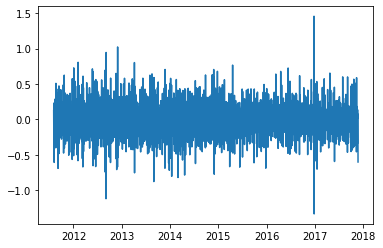

In [283]:
plt.plot(y_train["Energy (kWh)"])
plt.show()

In [66]:
y_test.index=y_test["Start Date"]
y_test = y_test.drop(columns="Start Date")
y_train.index=y_train["Start Date"]
y_train = y_train.drop(columns="Start Date")


In [264]:
y_test['Energy (kWh)'] = np.log(y_test['Energy (kWh)'])
y_test['Energy (kWh)'] = y_test['Energy (kWh)'].diff().dropna()
y_test.index=y_test["Start Date"]
y_test.index = y_test.index.to_period('D')
#y_test = y_test.drop(columns="Start Date")

y_train['Energy (kWh)'] = np.log(y_train['Energy (kWh)'])
y_train['Energy (kWh)'] = y_train['Energy (kWh)'].diff().dropna()
y_train.index=y_train["Start Date"]
y_train.index = y_train.index.to_period('D')
#y_train = y_train.drop(columns="Start Date")

<IPython.core.display.Javascript object>

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<IPython.core.display.Javascript object>

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [221]:
y_train['Energy (kWh)'] = np.log(y_train['Energy (kWh)'])
y_train['Energy (kWh)'] = y_train['Energy (kWh)'].diff()
y_train = y_train.dropna()
y_train

<IPython.core.display.Javascript object>

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Energy (kWh),Start Date
6,0.122731,2011-08-04
7,-0.187535,2011-08-05
8,0.230203,2011-08-06
9,0.119161,2011-08-07
10,-0.608959,2011-08-08
...,...,...
2303,0.127576,2017-11-19
2304,0.135252,2017-11-20
2305,0.015620,2017-11-21
2306,0.072955,2017-11-22


In [274]:
y_train

,Energy (kWh)
Start Date,
2011-08-03,NaN
2011-08-04,0.122731
2011-08-05,-0.187535
2011-08-06,0.230203
2011-08-07,0.119161
...,...
2017-11-19,0.127576
2017-11-20,0.135252
2017-11-21,0.015620


In [284]:
result = adfuller(y_train["Energy (kWh)"].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -14.758926
p-value: 0.000000


In [14]:
#y_test = y_test.diff().dropna()
y_train = y_train.diff().dropna()

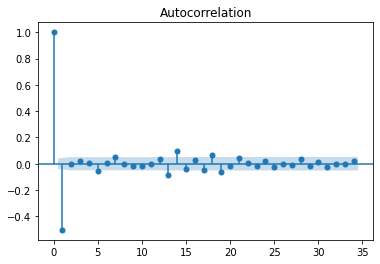

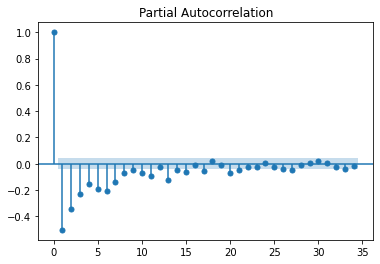

In [286]:
plot_acf(y_train["Energy (kWh)"].dropna())
plt.show()
plot_pacf(y_train["Energy (kWh)"].dropna())
plt.show()

In [310]:
y_train.freq= "D"

In [315]:
y_train = y_train.resample("d").min()

In [359]:
y_train[y_train["Energy (kWh)"].isna()]

,Energy (kWh),Start Date
Start Date,,
2011-08-03,NaN,2011-08-03
2011-09-09,NaN,NaT
2012-01-08,NaN,NaT


In [360]:
model1 = ARIMA(y_train["Energy (kWh)"][y_train["Start Date"].dt.year>2012] ,order=(1,0,8), freq="D")

In [398]:
sam = SARIMAX(y_train["Energy (kWh)"][y_train["Start Date"].dt.year>2012] ,order=(1,0,8), seasonal_order=(1,0,8,12), freq="D")

In [399]:
sam_fit = sam.fit(method="bfgs", cov_type="robust")

         Current function value: -0.299878
         Iterations: 3
         Function evaluations: 67
         Gradient evaluations: 55
c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [400]:
sam_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Energy (kWh)   No. Observations:                 1788
Model:             SARIMAX(1, 0, 8)x(1, 0, 8, 12)   Log Likelihood                 536.181
Date:                            Fri, 19 Mar 2021   AIC                          -1034.362
Time:                                    09:25:29   BIC                           -930.074
Sample:                                01-01-2013   HQIC                          -995.853
                                     - 11-23-2017                                         
Covariance Type:                           robust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6791      0.334     -2.032      0.042      -1.334      -0.024
ma.L1         -0.2599      0.332     -0.782      0.434      -0.912       0.392
ma.L2         -0.6543      0.311     -2.106      0.035      -1.263      -0.045
ma.L3          0.0060      0.030      0.199      0.842      -0.053       0.065
ma.L4          0.0067      0.030      0.221      0.825      -0.053       0.066
ma.L5         -0.0162      0.029     -0.560      0.575      -0.073       0.040
ma.L6          0.0591      0.030      1.937      0.053      -0.001       0.119
ma.L7          0.0633      0.027      2.385      0.017       0.011       0.115
ma.L8         -0.0380      0.026     -1.476      0.140      -0.088       0.012
ar.S.L12      -0.0252      1.528     -0.016      0.987      -3.019       2.969
ma.S.L12       0.0138      1.529      0.009      0.993      -2.982       3.010
ma.S.L24       0.0012      0.029      0.040      0.968      -0.056       0.059
ma.S.L36       0.0050      0.024      0.207      0.836      -0.042       0.052
ma.S.L48      -0.0187      0.026     -0.717      0.473      -0.070       0.032
ma.S.L60      -0.0099      0.036     -0.279      0.780      -0.080       0.060
ma.S.L72      -0.0231      0.026     -0.875      0.382      -0.075       0.029
ma.S.L84       0.0075      0.043      0.173      0.862      -0.077       0.092
ma.S.L96      -0.0155      0.028     -0.558      0.577      -0.070       0.039
sigma2         0.0319      0.001     22.077      0.000       0.029       0.035
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               206.22
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

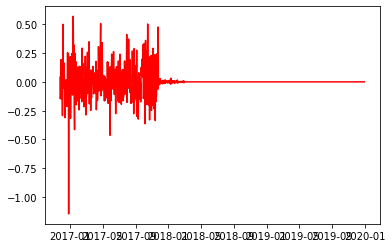

In [403]:
plt.plot(sam_fit.predict(start=pd.to_datetime("2016-11-24"),end=pd.to_datetime("2019-12-31"), dynamic=False,typ="levels"),c="r")
#plt.plot(y_test["Energy (kWh)"])
plt.show()

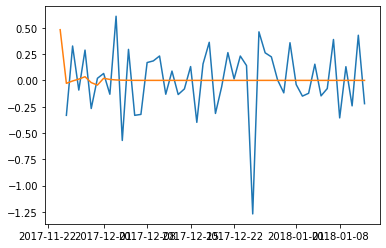

In [397]:
n=50
y_pred = model_fit.forecast(steps = n)
plt.plot(y_test["Energy (kWh)"][:n])
plt.plot(y_pred)
plt.show()

In [356]:
y_train.values.reshape(1,-1) 


array([[1.67988194, 1.8992418 , 1.5744709 , ..., 2.2426    , 2.41232357,
        1.31924103]])

In [343]:
model = auto_arima(y_train.values,start_p=2,start_q=2,trace=True, suppress_warnings=True, method="bfgs")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2237.692, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3596.884, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2931.007, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2097.490, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3594.885, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2099.399, Time=1.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2187.547, Time=1.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2101.421, Time=2.78 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2095.917, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2097.817, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2185.427, Time=0.57 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2929.007, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2099.847, Time=1.35 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 10.172 seconds


In [363]:
model_fit = model1.fit(method="innovations_mle")
# solver="bfgs"
#method="innovations_mle"
#model_fit = model.fit(y_train)

In [364]:
model_fit.mle_retvals

AttributeError: 'ARIMAResults' object has no attribute 'mle_retvals'

In [365]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Energy (kWh)   No. Observations:                 1788
Model:                 ARIMA(1, 0, 8)   Log Likelihood                 547.525
Date:                Thu, 18 Mar 2021   AIC                          -1073.049
Time:                        23:34:25   BIC                          -1012.672
Sample:                    01-01-2013   HQIC                         -1050.754
                         - 11-23-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.744      0.457      -0.000       0.001
ar.L1          0.4463      0.229      1.947      0.052      -0.003       0.896
ma.L1         -1.3908      0.228     -6.102      0.000      -1.838      -0.944
ma.L2          0.4100      0.218      1.883      0.060      -0.017       0.837
ma.L3          0.0096      0.042      0.227      0.820      -0.073       0.093
ma.L4         -0.0110      0.041     -0.267      0.790      -0.092       0.070
ma.L5         -0.0432      0.041     -1.062      0.288      -0.123       0.037
ma.L6          0.0755      0.043      1.737      0.082      -0.010       0.161
ma.L7          0.0527      0.043      1.218      0.223      -0.032       0.137
ma.L8         -0.0769      0.022     -3.453      0.001      -0.120      -0.033
sigma2         0.0317      0.001     39.174      0.000       0.030       0.033
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               222.46
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

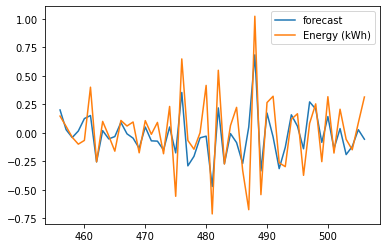

In [240]:
model_fit.plot_predict(start=450,end=500,dynamic=False);

In [186]:
model_fit.resid[1:50]

Start Date
2011-08-05   -0.212560
2011-08-06    0.257541
2011-08-07    0.451112
2011-08-08   -0.666540
2011-08-09   -0.539129
2011-08-10   -0.274690
2011-08-11   -0.360386
2011-08-12   -0.487774
2011-08-13   -0.116456
2011-08-14    0.015908
2011-08-15   -0.121723
2011-08-16    0.018642
2011-08-17    0.254776
2011-08-18   -0.195000
2011-08-19    0.047391
2011-08-20   -0.493770
2011-08-21    0.191207
2011-08-22   -0.152813
2011-08-23    0.305532
2011-08-24   -0.030957
2011-08-25   -0.071338
2011-08-26   -0.314190
2011-08-27    0.405798
2011-08-28    0.063372
2011-08-29   -0.185554
2011-08-30    0.432549
2011-08-31   -0.029924
2011-09-01    0.166059
2011-09-02    0.421753
2011-09-03    0.131118
2011-09-04   -0.065864
2011-09-05    0.616368
2011-09-06   -0.560386
2011-09-07   -0.192589
2011-09-08    0.121692
2011-09-10   -0.348969
2011-09-11   -0.365613
2011-09-12   -0.200979
2011-09-13    0.688833
2011-09-14   -0.205363
2011-09-15    0.090670
2011-09-16    0.137089
2011-09-17    0.048926


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

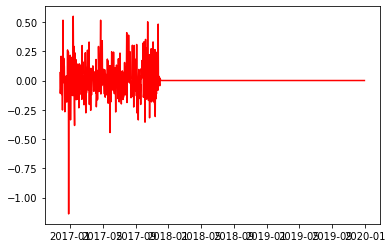

In [377]:
plt.plot(model_fit.predict(start=pd.to_datetime("2016-11-24"),end=pd.to_datetime("2019-12-31"), dynamic=False,typ="levels"),c="r")
#plt.plot(y_test["Energy (kWh)"])
plt.show()

In [75]:
mape = np.mean(np.abs(y_pred.to_numpy() - y_test.values[:n])/np.abs(y_test.values[:n]))
mape

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.9926866880739185

In [381]:
n=50
y_pred = model_fit.get_forecast(steps = n).summary_frame()

In [382]:
y_pred

Energy (kWh),mean,mean_se,mean_ci_lower,mean_ci_upper
2017-11-24,0.482140,0.178024,0.133219,0.831061
2017-11-25,-0.027939,0.244881,-0.507896,0.452018
2017-11-26,-0.005464,0.244889,-0.485439,0.474510
2017-11-27,0.012269,0.244891,-0.467708,0.492245
2017-11-28,0.034959,0.244896,-0.445028,0.514946
2017-11-29,-0.021000,0.245040,-0.501270,0.459270
2017-11-30,-0.044527,0.245232,-0.525172,0.436119
2017-12-01,0.020233,0.245614,-0.461162,0.501628
2017-12-02,0.009113,0.245731,-0.472510,0.490736
2017-12-03,0.004150,0.245754,-0.477519,0.485819


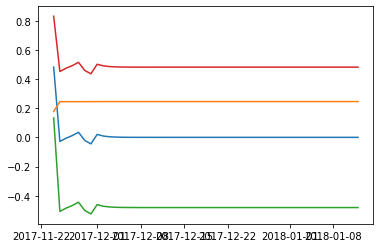

In [383]:
plt.plot(y_pred)
plt.show()

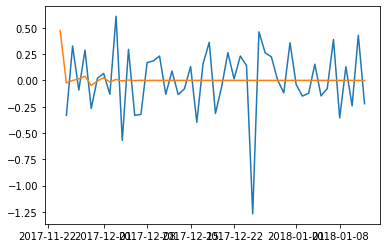

In [353]:
plt.plot(y_test["Energy (kWh)"][:n])
plt.plot(y_pred)
plt.show()